<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
بهار ۱۴۰۱
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
تمرین عملی چهار
            	<br/>
			</font>
طراحان: یاسمن زلفی موصلو و مهرانه نجفی
			<br/><br/>
موعد تحویل: 24 خرداد
                <br/>
                همفکری در تمامی تمرین‌های درس توصیه می‌شود. در عین حال از شما انتظار می‌رود تمام پیاده‌سازی را به تنهایی و بدون مشاهده کد دیگران انجام دهید.
                <br/><br/>
                <font color=red>
                لطفا در فایل ارسالی تمام بلوک‌های کد اجرا شده و شامل نمودار‌ها و خروجی‌های لازم باشند.
     </font>
                <br/>
        </style>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            الگوریتم برتر
        </font>
        <hr>
             شرکت آپارات یک الگوریتم جدید (الگوریتم B) برای سیستم توصیه‌گر (recommender system) ویدیو خود توسعه داده است.
        مسئولان شرکت می‌خواهند بررسی کنند که کارایی الگوریتم جدید در مقایسه با الگوریتم قبلی (الگوریتم A) چگونه است و
        آیا تفاوت قابل توجهی میان این دو وجود دارد یا خیر. <br/>
        برای این منظور تصمیم گرفتند که برای مدت 15 روز نیمی از ترافیک از الگوریتم جدید و نیم دیگر آن از الگوریتم قبلی استفاده کند و میزان کلیک کاربران بر روی
        فیلم‌های پیشنهاد شده توسط این دو الگوریتم با یکدیگر مقایسه شود.
        نتایج این آزمون در فایل AB_test.csv آمده است.
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
             لود کردن داده:
    </font>
</div>

In [3]:
AB_test_data <- read.csv("AB_test.csv", header=TRUE)

In [4]:
str(AB_test_data)

'data.frame':	30 obs. of  3 variables:
 $ X            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ algorithm    : chr  "A" "A" "A" "A" ...
 $ clicks_number: int  1077 1026 1010 1064 1068 1015 990 989 964 982 ...


<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
             می‌خواهیم به کمک آزمون T تصمیم بگیریم که آیا الگوریتم B را جایگزین الگوریتم A کنیم یا خیر.<br/>
        الف) فرض صفر و فرض یک را معرفی کنید.
    </font>
</div>

## Hypothesis Definition for the A/B Test

To compare the performance of algorithm B (new) against algorithm A (old) based on user clicks, we define the following hypotheses:

### **Null Hypothesis (H₀)**:
The mean number of clicks received by algorithm B is equal to the mean number of clicks received by algorithm A. This means that the new algorithm does not significantly affect the number of clicks.

H₀: μ_A = μ_B

### **Alternative Hypothesis (H₁)**:
The mean number of clicks received by algorithm B is different from the mean number of clicks received by algorithm A. This indicates that the new algorithm has a significant impact, either positive or negative.

H₁: μ_A ≠ μ_B

Since we are testing for any significant difference in either direction (increase or decrease in clicks), this is a **two-tailed t-test**.


<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
             ب) آزمون T را انجام داده و p-value را به‌دست آورید. با $\alpha = 0.05$ آیا می‌توان گفت الگوریتم B بهتر از A است؟
    </font>
</div>

In [5]:
# تقسیم داده‌ها به دو گروه A و B
group_A <- AB_test_data$clicks_number[AB_test_data$algorithm == "A"]
group_B <- AB_test_data$clicks_number[AB_test_data$algorithm == "B"]

# اجرای آزمون T دو نمونه مستقل (یک دنباله)
t_test_result <- t.test(
  x = group_B,  # گروه B
  y = group_A,  # گروه A
  alternative = "greater",  # آزمون یک دنباله (B > A)
  var.equal = FALSE         # فرض نابرابری واریانس
)

# نمایش نتایج
print(t_test_result)

# تصمیم‌گیری با α = 0.05
if (t_test_result$p.value < 0.05) {
  cat("با توجه به p-value =", t_test_result$p.value, "فرض صفر رد می‌شود. الگوریتم B بهتر است.")
} else {
  cat("با توجه به p-value =", t_test_result$p.value, "فرض صفر پذیرفته می‌شود. تفاوت معناداری وجود ندارد.")
}


	Welch Two Sample t-test

data:  group_B and group_A
t = 1.575, df = 26.373, p-value = 0.06359
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -2.361642       Inf
sample estimates:
mean of x mean of y 
 1058.400  1029.733 

با توجه به p-value = 0.06359157 فرض صفر پذیرفته می‌شود. تفاوت معناداری وجود ندارد.

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        حال آزمون جایگشت را به گونه‌ای پیاده‌سازی کنید که n مرحله، در هر مرحله یک جایگشت تصادفی از سطرها را در نظر بگیرد و اختلاف دو الگوریتم A و B را به
        دست آورد. P-value را برای این آزمون محاسبه کرده و با حالت قبل مقایسه کنید.
    </font>
</div>

In [6]:
# تعداد مراحل جایگشت
n <- 1000

# محاسبه اختلاف میانگین واقعی
observed_diff <- mean(group_B) - mean(group_A)

# ایجاد بردار برای ذخیره اختلاف‌های جایگشت‌شده
perm_diffs <- numeric(n)

# اجرای آزمون جایگشت
for (i in 1:n) {
  # جایگشت برچسب‌های گروه‌ها
  shuffled_labels <- sample(AB_test_data$algorithm)

  # محاسبه اختلاف میانگین برای جایگشت
  perm_group_A <- AB_test_data$clicks_number[shuffled_labels == "A"]
  perm_group_B <- AB_test_data$clicks_number[shuffled_labels == "B"]
  perm_diffs[i] <- mean(perm_group_B) - mean(perm_group_A)
}

# محاسبه p-value
p_value_perm <- sum(perm_diffs >= observed_diff) / n

# نمایش p-value آزمون جایگشت
cat("p-value آزمون جایگشت:", p_value_perm, "\n")

# مقایسه با p-value آزمون T
cat("p-value آزمون T:", t_test_result$p.value, "\n")

# تصمیم‌گیری
if (p_value_perm < 0.05) {
  cat("با توجه به p-value =", p_value_perm, "فرض صفر رد می‌شود. الگوریتم B بهتر است.")
} else {
  cat("با توجه به p-value =", p_value_perm, "فرض صفر پذیرفته می‌شود. تفاوت معناداری وجود ندارد.")
}

p-value آزمون جایگشت: 0.075 
p-value آزمون T: 0.06359157 
با توجه به p-value = 0.075 فرض صفر پذیرفته می‌شود. تفاوت معناداری وجود ندارد.

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            واکسیناسیون
        </font>
        <hr>
             در فایل vaccination.csv اطلاعات مربوط به سن و نوع واکسن تزریق شده به افراد مختلف آمده است.
        گروه سنی افراد را به صورت زیر تعریف می‌کنیم:<br/>
        گروه سنی نوجوان : $12 \leq age < 18$ <br/>
        گروه سنی جوان : $18 \leq age < 40$ <br/>
        گروه سنی بزرگسال : $40 \leq age < 70$ <br/>
        گروه سنی سالمند : $70 \leq age$ <br/>
        نموداری رسم کنید که نشان دهد در هر گروه سنی چند نفر از هر نوع واکسن تزریق کرده‌اند.
    </font>
</div>

In [7]:
vaccination_data <- read.csv("vaccination.csv", header=TRUE)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        به کمک آزمون فرض مناسب بررسی کنید که آیا گروه سنی افراد از نوع واکسن تزریق شده به آنها مستقل است یا خیر.
    </font>
</div>

'data.frame':	430 obs. of  4 variables:
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age         : int  12 16 15 14 17 14 14 15 16 15 ...
 $ vaccine_type: chr  "a" "a" "a" "a" ...
 $ age_group   : Factor w/ 4 levels "نوجوان","جوان",..: 1 1 1 1 1 1 1 1 1 1 ...
         
           a  b  c  d  e
  نوجوان  10 12  6  1  1
  جوان    24 32 18 35 41
  بزرگسال 20 25 16 30 29
  سالمند  19 22 28 32 29


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 27.997, df = 12, p-value = 0.005538

با توجه به p-value = 0.005538285 فرض صفر رد می‌شود. گروه سنی و نوع واکسن مستقل نیستند.

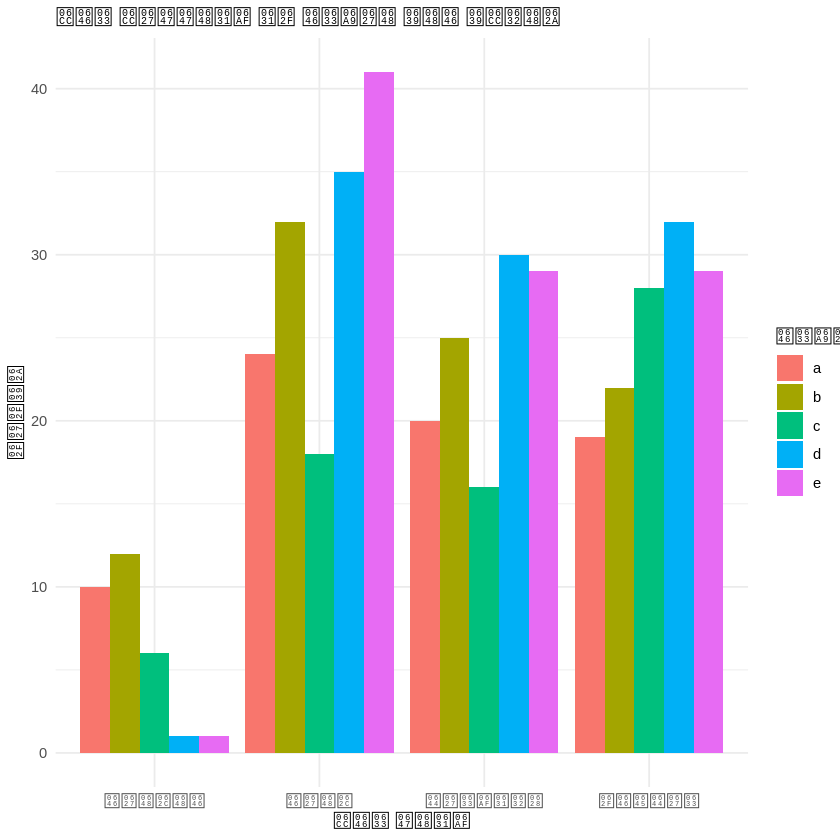

In [8]:
# لود کتابخانه‌های لازم
library(ggplot2)

# لود داده‌ها
vaccination_data <- read.csv("vaccination.csv", header = TRUE)

# تعریف گروه‌های سنی
vaccination_data$age_group <- cut(
  vaccination_data$age,
  breaks = c(12, 18, 40, 70, Inf),
  labels = c("نوجوان", "جوان", "بزرگسال", "سالمند"),
  right = FALSE
)

# نمایش ساختار داده‌ها
str(vaccination_data)

# رسم نمودار توزیع واکسن در گروه‌های سنی
ggplot(vaccination_data, aes(x = age_group, fill = vaccine_type)) +
  geom_bar(position = "dodge") +
  labs(
    title = "توزیع نوع واکسن در گروه‌های سنی",
    x = "گروه سنی",
    y = "تعداد",
    fill = "نوع واکسن"
  ) +
  theme_minimal()

# آزمون استقلال کای اسکوئر
# ساخت جدول توافقی
contingency_table <- table(vaccination_data$age_group, vaccination_data$vaccine_type)

# نمایش جدول توافقی
print(contingency_table)

# اجرای آزمون کای اسکوئر
chi_sq_test <- chisq.test(contingency_table)

# نمایش نتایج آزمون
print(chi_sq_test)

# تصمیم‌گیری
if (chi_sq_test$p.value < 0.05) {
  cat("با توجه به p-value =", chi_sq_test$p.value, "فرض صفر رد می‌شود. گروه سنی و نوع واکسن مستقل نیستند.")
} else {
  cat("با توجه به p-value =", chi_sq_test$p.value, "فرض صفر پذیرفته می‌شود. گروه سنی و نوع واکسن مستقل هستند.")
}

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
            تخمین‌گرهای واریانس
        </font>
        <hr>
             در این سوال به بررسی دو تخمین‌گر رایج واریانس می‌پردازیم. اولین تخمین‌گر مربوط به MLE است:
    </font>
</div>


$$\hat{\sigma^2} = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2$$


<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        تخمین‌گر بعدی شامل تصحیح بسل(bessel's corrextion) می‌باشد:
    </font>
</div>

$$\hat{\sigma^2} = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2$$

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
                نمونه‌هایی از یک توزیع
                Normal(2, 2)
                با اندازه ۲ تا ۱۰۰۰ تولید کرده و برای هر  کدام  بایاس را محاسبه کنید.
            </li>
        </ul>
	</font>
</div>

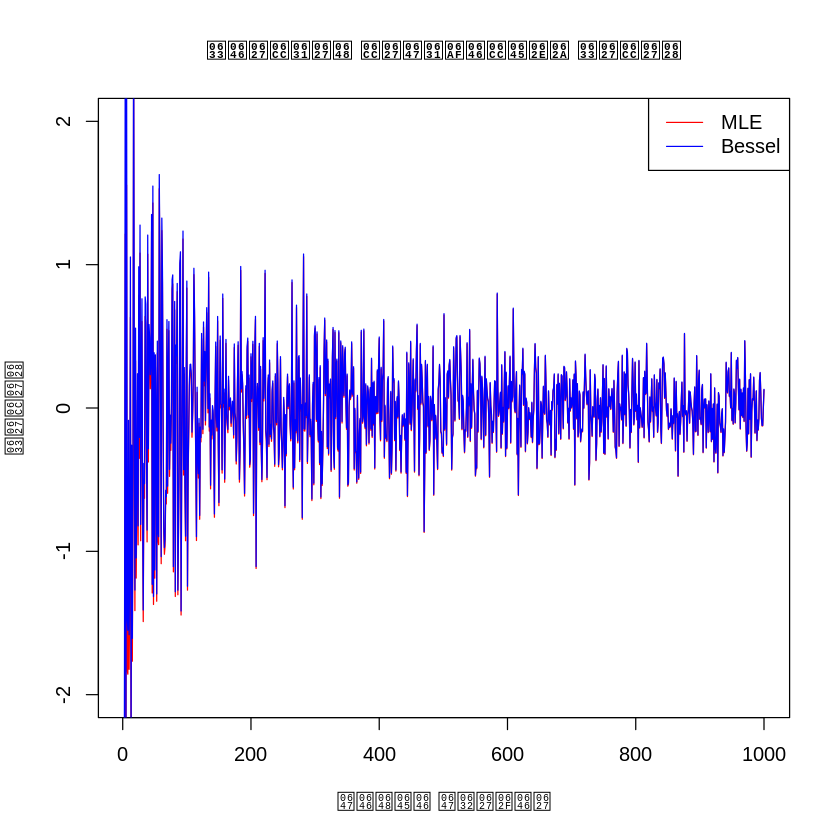

In [9]:
# تنظیم seed برای تکرارپذیری
set.seed(123)

# پارامترهای توزیع نرمال
mean_true <- 2
sd_true <- 2
true_variance <- sd_true^2  # واریانس واقعی = 4

# بازه اندازه نمونه‌ها
sample_sizes <- 2:1000

# ایجاد بردارهای برای ذخیره بایاس
bias_mle <- numeric(length(sample_sizes))
bias_bessel <- numeric(length(sample_sizes))

# محاسبه بایاس برای هر اندازه نمونه
for (i in seq_along(sample_sizes)) {
  n <- sample_sizes[i]

  # تولید نمونه از توزیع نرمال
  sample_data <- rnorm(n, mean = mean_true, sd = sd_true)

  # محاسبه میانگین نمونه
  sample_mean <- mean(sample_data)

  # محاسبه تخمین‌گر MLE
  var_mle <- sum((sample_data - sample_mean)^2) / n
  bias_mle[i] <- var_mle - true_variance

  # محاسبه تخمین‌گر با تصحیح بسل
  var_bessel <- var(sample_data)  # تابع var در R از تصحیح بسل استفاده می‌کند
  bias_bessel[i] <- var_bessel - true_variance
}

# رسم نمودار بایاس
plot(sample_sizes, bias_mle, type = "l", col = "red", ylim = c(-2, 2),
     xlab = "اندازه نمونه", ylab = "بایاس", main = "بایاس تخمین‌گرهای واریانس")
lines(sample_sizes, bias_bessel, col = "blue")
legend("topright", legend = c("MLE", "Bessel"), col = c("red", "blue"), lty = 1)

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
                 حال این مقادیر را در نمودار رسم کنید.
            </li>
            <li>
با توجه به این نمودار ها آیا این دو تخمین‌گر سازگار هستند؟
            </li>
        </ul>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
        </font>
        پاسخ: بله برای نمونه سایز بزرگ تر به صفر نزدیک میشود.
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        <ul>
            <li>
                 این بار صد هزار نمونه ده‌تایی از همان توزیع تولید کنید و میانگین بایاس را محاسبه کنید.
            </li>
            <li>
                با توجه به این مقادیر آیا این دو تخمین‌گر unbiased هستند؟
            </li>
        </ul>
	</font>
</div>

In [10]:
# تنظیم seed برای تکرارپذیری
set.seed(123)

# پارامترهای توزیع نرمال
mean_true <- 2
sd_true <- 2
true_variance <- sd_true^2  # واریانس واقعی = 4

# تعداد نمونه‌ها
num_samples <- 100000
sample_size <- 10

# ایجاد بردارهای برای ذخیره تخمین‌گرها
var_mle <- numeric(num_samples)
var_bessel <- numeric(num_samples)

# تولید نمونه‌ها و محاسبه تخمین‌گرها
for (i in 1:num_samples) {
  # تولید نمونه از توزیع نرمال
  sample_data <- rnorm(sample_size, mean = mean_true, sd = sd_true)

  # محاسبه میانگین نمونه
  sample_mean <- mean(sample_data)

  # محاسبه تخمین‌گر MLE
  var_mle[i] <- sum((sample_data - sample_mean)^2) / sample_size

  # محاسبه تخمین‌گر با تصحیح بسل
  var_bessel[i] <- var(sample_data)  # تابع var در R از تصحیح بسل استفاده می‌کند
}

# محاسبه میانگین تخمین‌گرها
mean_var_mle <- mean(var_mle)
mean_var_bessel <- mean(var_bessel)

# محاسبه بایاس
bias_mle <- mean_var_mle - true_variance
bias_bessel <- mean_var_bessel - true_variance

# نمایش نتایج
cat("میانگین تخمین‌گر MLE:", mean_var_mle, "\n")
cat("میانگین تخمین‌گر با تصحیح بسل:", mean_var_bessel, "\n")
cat("بایاس تخمین‌گر MLE:", bias_mle, "\n")
cat("بایاس تخمین‌گر با تصحیح بسل:", bias_bessel, "\n")

# بررسی بی‌ریبی
if (abs(bias_mle) < 0.01) {
  cat("تخمین‌گر MLE بی‌ریب است.\n")
} else {
  cat("تخمین‌گر MLE اریب است.\n")
}

if (abs(bias_bessel) < 0.01) {
  cat("تخمین‌گر با تصحیح بسل بی‌ریب است.\n")
} else {
  cat("تخمین‌گر با تصحیح بسل اریب است.\n")
}

میانگین تخمین‌گر MLE: 3.59826 
میانگین تخمین‌گر با تصحیح بسل: 3.998066 
بایاس تخمین‌گر MLE: -0.4017404 
بایاس تخمین‌گر با تصحیح بسل: -0.001933821 
تخمین‌گر MLE اریب است.
تخمین‌گر با تصحیح بسل بی‌ریب است.
